
#GRIP : GRADUATE INTERNSHIP ROTATIONAL PROGRAM
#THE SPARKS FOUNDATION
#DATA SCIENCE AND BUSINESS ANALYTICS INTERN
# **AUTHOR: ISHA RANKA**
Task 2-predict the optimum number of clusters
and represent it visually.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
data=pd.read_csv("/gdrive/MyDrive/Iris.csv")

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data.drop('Id',axis=1,inplace=True)

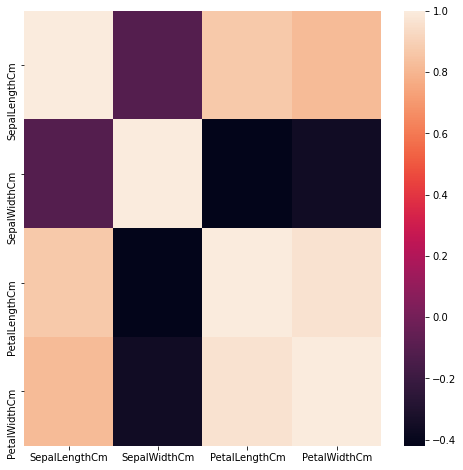

In [ ]:
corrmat = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrmat)

In [ ]:
dict={'Iris-setosa':0,'Iris-virginica':1,'Iris-versicolor':2}
data['Species']=data['Species'].map(dict)

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


#Using only one feature (petal length) for visualization:

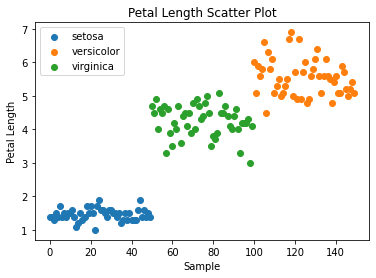

In [ ]:
plt.scatter(data.loc[data['Species']==0,'PetalLengthCm'].index, data.loc[data['Species']==0,'PetalLengthCm'], label= 'setosa')
plt.scatter(data.loc[data['Species']==1,'PetalLengthCm'].index, data.loc[data['Species']==1,'PetalLengthCm'], label= 'versicolor')
plt.scatter(data.loc[data['Species']==2,'PetalLengthCm'].index, data.loc[data['Species']==2,'PetalLengthCm'], label= 'virginica')
plt.xlabel('Sample') 
plt.ylabel('Petal Length')
plt.title('Petal Length Scatter Plot')
plt.legend()
plt.legend()

#Using only one feature (petal width) for visualization:

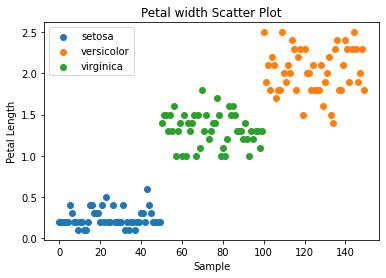

In [ ]:
plt.scatter(data.loc[data['Species']==0,'PetalWidthCm'].index, data.loc[data['Species']==0,'PetalWidthCm'], label= 'setosa')
plt.scatter(data.loc[data['Species']==1,'PetalWidthCm'].index, data.loc[data['Species']==1,'PetalWidthCm'], label= 'versicolor')
plt.scatter(data.loc[data['Species']==2,'PetalWidthCm'].index, data.loc[data['Species']==2,'PetalWidthCm'], label= 'virginica')
plt.xlabel('Sample') 
plt.ylabel('Petal Length')
plt.title('Petal width Scatter Plot')
plt.legend()
plt.legend()

#**finding optimal number od cluster with k-means clustering**

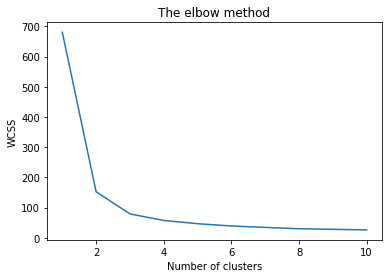

In [ ]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# what if we have 2 cluster?

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

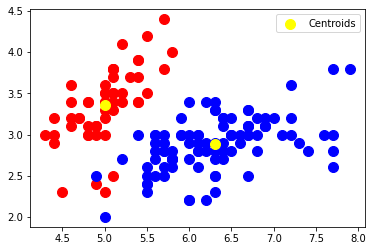

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#**Clearly the the curve bends at 3...we will try with 3 cluster**

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

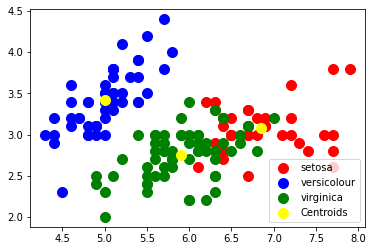

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#principal component analysis

In [ ]:
from sklearn.decomposition import PCA
sklearn_pca= PCA(n_components=.95) 

In [ ]:
print(x.shape)

sklearn_pca.fit(x)
x_transformed = sklearn_pca.transform (x)
print(x_transformed.shape)



(150, 4)
(150, 2)


#lets plot we two principal components

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_transformed)

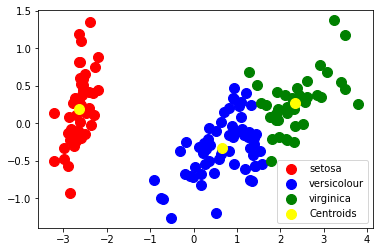

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x_transformed[y_kmeans == 0, 0], x_transformed[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'setosa')
plt.scatter(x_transformed[y_kmeans == 1, 0], x_transformed[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'versicolour')
plt.scatter(x_transformed[y_kmeans == 2, 0], x_transformed[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#**Thus,clearly the optimal number of clusters are 3**
#thank you